# Evaluating classification models performance 


# false/postive or type 1 error
the model predict that positive but the answer was false
model predict an event that dont occur

# false/negative or type 1 error
the model predict that it was negative but it was true 


# confusion matrix

the struture is like

# Truenegative Falsepositive
#  Falsenegative     Truepositive

# calculate two rates


# Accuracy Rate=correct /total
# error=wrong/total

# accuracy paradox

when we are going to tell the model to stop making predictions,whatsoever which is going to abandom them all completely,and we are going to say that from now on our predictions is always zero,we are always going to predict that the event is not going to occur,
so the confusion martix we ,
add true positive with false postive  and false negative with false postive ,and after that if we check the accuracy then it will be incrased with some ratios, this is called accuracy paradox

# classification Accuracy 
Classification accuracy shows how many of the predictions are correct
![](acc.png)

# confusion martrix
A confusion matrix is not a metric to evaluate a model, but it provides insight into the predictions. It is important to learn confusion matrix in order to comprehend other classification metrics such as precision and recall.

![](cm.png)

# Precision and Recall
Precision and recall metrics take the classification accuracy one step further and allow us to get a more specific understanding of model evaluation. Which one to prefer depends on the task and what we aim to achieve.
Precision measures how good our model is when the prediction is positive.

![](p.png)

The focus of precision is positive predictions. It indicates how many positive predictions are true.


# recall 
Recall measures how good our model is at correctly predicting positive classes.
![](r.png)

# F1 Score
There is another measure that combines precision and recall into a single number and that is F1 score.
![](f.png)

F1 score is a more useful measure than accuracy for problems with uneven class distribution because it takes into account both false positive and false negatives.
The best value for f1 score is 1 and the worst is 0

![](total.jfif)

# Specificity
is a measure that tells us what proportion of patients that did NOT have cancer, were predicted by the model as non-cancerous. The actual negatives (People actually NOT having cancer are FP and TN) and the people diagnosed by us not having cancer are TN. (Note: FP is included because the Person did NOT actually have cancer even though the model predicted otherwise).

In [1]:
import numpy as np
from sklearn.metrics import f1_score

#define array of actual classes
actual = np.repeat([1, 0], repeats=[160, 240])

#define array of predicted classes
pred = np.repeat([1, 0, 1, 0], repeats=[120, 40, 70, 170])

#calculate F1 score
f1_score(actual, pred)


0.6857142857142857

In [2]:
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Loading the breast cancer data set
diabetes_data = load_breast_cancer()

# Creating independent and dependent variables
X = diabetes_data.data
y = diabetes_data.target

# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

# Training a binary classifier using Random Forest Algorithm with default hyperparameters
classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)

# Here X_test, y_test are the test data points
predictions = classifier.predict(X_test)

Train Data: (455, 30), (455,)
Train Data: (114, 30), (114,)


In [3]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.9473684210526315


[[39  2]
 [ 4 69]]


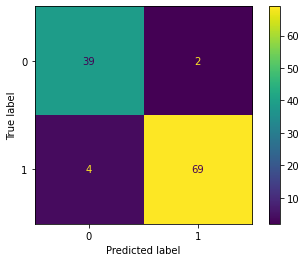

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [5]:
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.971830985915493


In [6]:
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

Recall Score of the classifier is: 0.9452054794520548


In [7]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

F1 Score of the classifier is: 0.9583333333333334


# AUC-ROC Curve
AUC-ROC Curve is a performance metric that is used to measure the performance for the classification model at different threshold values. ROC is Receiver Operating Characteristic Curve and AUC is Area Under Curve. The higher the value of AUC (Area under the curve), the better is our classifier in predicting the classes. AUC-ROC is mostly used in binary classification problems.
The ROC curve is plotted between True Positive Rate (TPR) and False Positive Rate (FPR) i.e. TPR on the y-axis and FPR on the x-axis. AUC is the area under the ROC curve. An excellent classifier has an AUC value near 1, whereas a poor-performing classifier has an AOC value near 0. A classifier with an AOC score of 0.5 doesn’t have any class separation capacity.



AUC for our classifier is: 0.9769462078182426


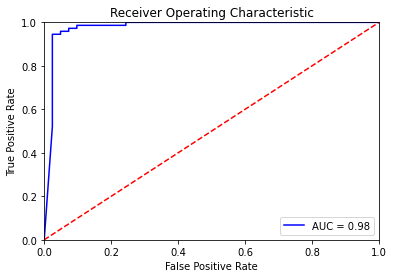

In [8]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()